In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix

In [2]:
import pandas as pd
import numpy as np

#Membaca file dataset
dp=pd.read_csv('hepatitis.csv')

#Menampilkan beberapa baris pertama data
print(dp.head())

   age     sex steroid  antivirals fatigue malaise anorexia liver_big  \
0   30    male   False       False   False   False    False     False   
1   50  female   False       False    True   False    False     False   
2   78  female    True       False    True   False    False      True   
3   31  female     NaN        True   False   False    False      True   
4   34  female    True       False   False   False    False      True   

  liver_firm spleen_palpable spiders ascites varices class  
0      False           False   False   False   False  live  
1      False           False   False   False   False  live  
2      False           False   False   False   False  live  
3      False           False   False   False   False  live  
4      False           False   False   False   False  live  


In [3]:
dp

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,class
0,30,male,False,False,False,False,False,False,False,False,False,False,False,live
1,50,female,False,False,True,False,False,False,False,False,False,False,False,live
2,78,female,True,False,True,False,False,True,False,False,False,False,False,live
3,31,female,NaN,True,False,False,False,True,False,False,False,False,False,live
4,34,female,True,False,False,False,False,True,False,False,False,False,False,live
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,46,female,True,False,True,True,True,True,False,False,True,True,True,die
151,44,female,True,False,True,False,False,True,True,False,False,False,False,live
152,61,female,False,False,True,True,False,False,True,False,True,False,False,live
153,53,male,False,False,True,False,False,True,False,True,True,False,True,live


In [5]:
dp['class'].value_counts()

live    123
die      32
Name: class, dtype: int64

In [6]:
#Mencari missing value diseluruh kolom data set
dp.isnull().sum()

age                 0
sex                 0
steroid             1
antivirals          0
fatigue             1
malaise             1
anorexia            1
liver_big          10
liver_firm         11
spleen_palpable     5
spiders             5
ascites             5
varices             5
class               0
dtype: int64

In [7]:
#Mencari nilai modus disetiap kolom yang terdapat missing value
dp['steroid'].mode()

0    True
Name: steroid, dtype: object

In [8]:
dp['fatigue'].mode()

0    True
Name: fatigue, dtype: object

In [9]:
dp['malaise'].mode()

0    False
Name: malaise, dtype: object

In [10]:
dp['anorexia'].mode()

0    False
Name: anorexia, dtype: object

In [11]:
dp['liver_big'].mode()

0    True
Name: liver_big, dtype: object

In [12]:
dp['liver_firm'].mode()

0    False
Name: liver_firm, dtype: object

In [13]:
dp['spleen_palpable'].mode()

0    False
Name: spleen_palpable, dtype: object

In [14]:
dp['spiders'].mode()

0    False
Name: spiders, dtype: object

In [15]:
dp['ascites'].mode()

0    False
Name: ascites, dtype: object

In [16]:
dp['varices'].mode()

0    False
Name: varices, dtype: object

In [17]:
#Menginputkan nilai modus yang sudah dicari
dp['steroid'] = dp['steroid'].fillna('True')
dp['fatigue'] = dp['fatigue'].fillna('True')
dp['malaise'] = dp['malaise'].fillna('False')
dp['anorexia'] = dp['anorexia'].fillna('False')
dp['liver_big'] = dp['liver_big'].fillna('True')
dp['liver_firm'] = dp['liver_firm'].fillna('False')
dp['spleen_palpable'] = dp['spleen_palpable'].fillna('False')
dp['spiders'] = dp['spiders'].fillna('False')
dp['ascites'] = dp['ascites'].fillna('False')
dp['varices'] = dp['varices'].fillna('False')

In [18]:
dp

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,class
0,30,male,False,False,False,False,False,False,False,False,False,False,False,live
1,50,female,False,False,True,False,False,False,False,False,False,False,False,live
2,78,female,True,False,True,False,False,True,False,False,False,False,False,live
3,31,female,True,True,False,False,False,True,False,False,False,False,False,live
4,34,female,True,False,False,False,False,True,False,False,False,False,False,live
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,46,female,True,False,True,True,True,True,False,False,True,True,True,die
151,44,female,True,False,True,False,False,True,True,False,False,False,False,live
152,61,female,False,False,True,True,False,False,True,False,True,False,False,live
153,53,male,False,False,True,False,False,True,False,True,True,False,True,live


In [19]:
#mengecek data duplikat
dp.duplicated().sum()

4

In [20]:
#Menghapus data duplikat
dp = dp.drop_duplicates()

In [21]:
dp.shape

(151, 14)

In [22]:
#Melihat type data disetiap kolomnya
print(dp.dtypes)

age                 int64
sex                object
steroid            object
antivirals           bool
fatigue            object
malaise            object
anorexia           object
liver_big          object
liver_firm         object
spleen_palpable    object
spiders            object
ascites            object
varices            object
class              object
dtype: object


In [23]:
#Transformasi (Enconding)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [24]:
# Daftar kolom yang ingin di-encode
columns_to_encode = ['sex', 'steroid', 'antivirals', 'fatigue', 'malaise', 
                     'anorexia', 'liver_big', 'liver_firm', 'spleen_palpable', 
                     'spiders', 'ascites', 'varices','class']

# Mengonversi kolom menjadi string dan melakukan encoding
for column in columns_to_encode:
    dp[column] = dp[column].astype(str)  # Mengonversi ke string
    dp[column] = le.fit_transform(dp[column])  # Lalu lakukan encoding

C:\Users\Administrator\AppData\Local\Temp\ipykernel_7180\2365673161.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dp[column] = dp[column].astype(str)  # Mengonversi ke string
C:\Users\Administrator\AppData\Local\Temp\ipykernel_7180\2365673161.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dp[column] = le.fit_transform(dp[column])  # Lalu lakukan encoding


In [25]:
dp

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,class
0,30,1,0,0,0,0,0,0,0,0,0,0,0,1
1,50,0,0,0,1,0,0,0,0,0,0,0,0,1
2,78,0,1,0,1,0,0,1,0,0,0,0,0,1
3,31,0,1,1,0,0,0,1,0,0,0,0,0,1
4,34,0,1,0,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,46,0,1,0,1,1,1,1,0,0,1,1,1,0
151,44,0,1,0,1,0,0,1,1,0,0,0,0,1
152,61,0,0,0,1,1,0,0,1,0,1,0,0,1
153,53,1,0,0,1,0,0,1,0,1,1,0,1,1


In [36]:
dp['class'].value_counts()

1    119
0     32
Name: class, dtype: int64

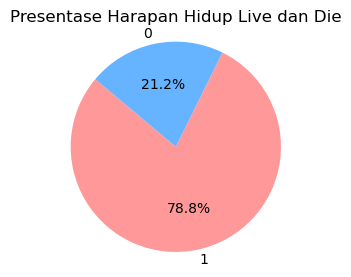

In [39]:
class_counts = dp['class'].value_counts()
plt.figure(figsize=(3, 3))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
plt.title('Presentase Harapan Hidup Live dan Die')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
plt.show()

In [32]:
#Split Data
from sklearn.model_selection import train_test_split

X = dp[['age','sex','steroid','antivirals','fatigue','malaise','anorexia','liver_big','liver_firm','spleen_palpable','spiders','ascites','varices']]
y = dp['class']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)
print(X_train)
print(y_test)

     age  sex  steroid  antivirals  fatigue  malaise  anorexia  liver_big  \
97    44    0        0           0        1        1         0          0   
151   44    0        1           0        1        0         0          1   
147   70    0        0           0        1        1         1          1   
6     51    0        0           0        1        0         1          1   
17    40    0        0           0        1        0         0          1   
..   ...  ...      ...         ...      ...      ...       ...        ...   
18    38    0        1           0        0        0         0          1   
100   48    0        0           0        1        1         0          1   
68    39    0        1           0        1        0         0          1   
129   57    0        0           0        1        1         0          1   
111   42    0        0           1        1        1         0          1   

     liver_firm  spleen_palpable  spiders  ascites  varices  
97           

In [27]:
from sklearn.naive_bayes import GaussianNB

# Inisialisasi classifier Naive Bayes
nbclassifier = GaussianNB()

# Melatih model menggunakan data latih
nbclassifier.fit(X_train, y_train)

GaussianNB()

In [28]:
#menentukan hasil prediksi dari X_test
y_pred = nbclassifier.predict(X_test)
y_pred

array([1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1])

In [29]:
#Menghitung nilai probabilitas X_test
nbclassifier.predict_proba(X_test)

array([[6.17850210e-05, 9.99938215e-01],
       [4.26812670e-04, 9.99573187e-01],
       [9.99522991e-01, 4.77008826e-04],
       [9.79233877e-01, 2.07661230e-02],
       [9.68649985e-01, 3.13500151e-02],
       [6.35790198e-05, 9.99936421e-01],
       [1.25796614e-04, 9.99874203e-01],
       [9.99999944e-01, 5.64686634e-08],
       [9.99999910e-01, 9.02782962e-08],
       [9.60917188e-01, 3.90828120e-02],
       [2.96315445e-05, 9.99970368e-01],
       [4.37067224e-05, 9.99956293e-01],
       [8.49928786e-01, 1.50071214e-01],
       [9.99999999e-01, 5.58096116e-10],
       [0.00000000e+00, 1.00000000e+00],
       [9.99999881e-01, 1.19262320e-07],
       [0.00000000e+00, 1.00000000e+00],
       [9.99999976e-01, 2.35826146e-08],
       [2.40421647e-08, 9.99999976e-01],
       [6.17850210e-05, 9.99938215e-01],
       [2.06358496e-02, 9.79364150e-01],
       [9.99999999e-01, 6.15518316e-10],
       [1.05744661e-08, 9.99999989e-01],
       [2.79919606e-04, 9.99720080e-01],
       [9.932355

In [30]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print('\nAccuracy:\n', accuracy_score(y_pred, y_test))

print('\nClassification Report:\n',classification_report(y_pred, y_test))
print('\nConfusion Matrix:\n', confusion_matrix(y_pred, y_test, labels=[1,0]))


Accuracy:
 0.6842105263157895

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.38      0.50        16
           1       0.67      0.91      0.77        22

    accuracy                           0.68        38
   macro avg       0.71      0.64      0.63        38
weighted avg       0.70      0.68      0.66        38


Confusion Matrix:
 [[20  2]
 [10  6]]


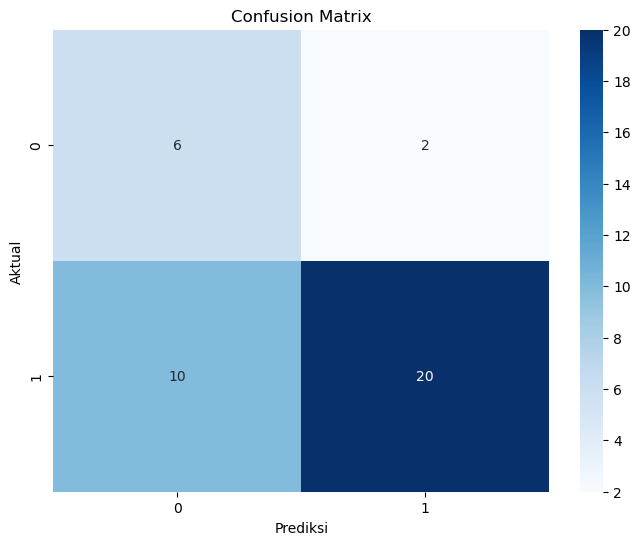

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Membuat confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.title('Confusion Matrix')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()  # Menampilkan plot

In [35]:
import pickle

In [36]:
pickle.dump(nbclassifier, open("model_new.pkl","wb"))